In [ ]:
!pip install gdown
!pip install jcopdl

  Created wheel for jcopdl: filename=jcopdl-1.1.9-py2.py3-none-any.whl size=16923 sha256=c8dd1ef47c3967618d46eafafcb665345f82919108e674e0abcceb85adcdf13b
  Stored in directory: /root/.cache/pip/wheels/e5/78/9d/931694cba38491e16f1a94719193211fd12a7307570d9bb562
Successfully built jcopdl


In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=acfb609e14186822b60452c26909911b4cfc5e5cad5207d177bc9dea419f62d7
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
!gdown --id 15k-WuUPdX6FHGvrSTS2wkf8-sDU1CwOE

Downloading...
From: https://drive.google.com/uc?id=15k-WuUPdX6FHGvrSTS2wkf8-sDU1CwOE
To: /content/Dataset_XFull.zip
100% 512M/512M [00:08<00:00, 58.3MB/s]


In [ ]:
!unzip Dataset_XFull.zip
!rm -rf Dataset_XFull.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Dataset_XFull/Training/normal/Normal-6383.png  
  inflating: Dataset_XFull/Training/normal/Normal-6384.png  
  inflating: Dataset_XFull/Training/normal/Normal-6385.png  
  inflating: Dataset_XFull/Training/normal/Normal-6386.png  
  inflating: Dataset_XFull/Training/normal/Normal-6387.png  
  inflating: Dataset_XFull/Training/normal/Normal-6388.png  
  inflating: Dataset_XFull/Training/normal/Normal-6389.png  
  inflating: Dataset_XFull/Training/normal/Normal-6390.png  
  inflating: Dataset_XFull/Training/normal/Normal-6391.png  
  inflating: Dataset_XFull/Training/normal/Normal-6392.png  
  inflating: Dataset_XFull/Training/normal/Normal-6393.png  
  inflating: Dataset_XFull/Training/normal/Normal-6394.png  
  inflating: Dataset_XFull/Training/normal/Normal-6395.png  
  inflating: Dataset_XFull/Training/normal/Normal-6396.png  
  inflating: Dataset_XFull/Training/normal/Normal-6397.png  
  inflating: Dataset_XFull

In [ ]:
# Move to One Folder
!mv /content/Dataset_XFull/Val/covid/* /content/Dataset_XFull/Training/covid
!mv /content/Dataset_XFull/Val/normal/* /content/Dataset_XFull/Training/normal
!mv /content/Dataset_XFull/Testing/covid/* /content/Dataset_XFull/Training/covid
!mv /content/Dataset_XFull/Testing/normal/* /content/Dataset_XFull/Training/normal
!rm -rf /content/Dataset_XFull/Testing
!rm -rf /content/Dataset_XFull/Val

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Dataset and Dataloader

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
bs = 64
crop_size = 224

transform = transforms.Compose([
  transforms.Resize((crop_size, crop_size)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_train = datasets.ImageFolder("/content/Dataset_XFull/Training", transform=transform)

# Split into Train Val
random_seed = 42
torch.manual_seed(random_seed)

val_size = int(len(data_train) * 0.15)
test_size = int(len(data_train) * 0.15)
train_size = len(data_train) - (val_size + test_size)

train_set, val_set, test_set = random_split(
    data_train,
    [train_size, val_size, test_size]
)


trainloader = DataLoader(train_set, batch_size=bs, shuffle=True)
valloader = DataLoader(val_set, batch_size=bs)
testloader = DataLoader(test_set, batch_size=bs)

In [ ]:
len(train_set), len(val_set), len(test_set)

(9666, 2071, 2071)

In [ ]:
label2cat = data_train.classes
label2cat

['covid', 'normal']

# Architecture and Config

In [ ]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')
# model.set_swish(memory_efficient=False)
model

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [ ]:
from torch import nn
model._fc = nn.Sequential(
            nn.Linear(1280, 512),
            nn.Linear(512, 2)
        )
model._swish = nn.LogSoftmax(dim=1)
model

FrontDamageNet(
  (basemodel): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
     

In [ ]:
import torch
from torch import nn
from efficientnet_pytorch import EfficientNet

class FrontDamageNet(nn.Module):
    def __init__(self, output_size=2):
        super().__init__()
        self.basemodel = EfficientNet.from_pretrained('efficientnet-b0')
        # self.basemodel.set_swish(memory_efficient=False)
        self.freeze()
        self.basemodel._fc = nn.Sequential(
            nn.Linear(1280, 512)
        )
        self.basemodel.classifier = nn.Sequential(
            nn.Linear(512, output_size),
            nn.LogSoftmax(dim=1)
        )
    
    def forward(self, x):
        x = self.basemodel(x)
        return x

    def freeze(self):
        for param in self.basemodel.parameters():
            param.requires_grad = False # Freezing Weight
    
    def unfreeze(self):
        for param in self.basemodel.parameters():
            param.requires_grad = True # Unfreezing Weight

    def predict(self, x):
        with torch.no_grad():
            self.basemodel.eval()
            output = self.basemodel(x)
            preds = output.argmax(1)
        return preds

In [ ]:
config = set_config({
    "output_size": len(data_train.classes),
    "batch_size": bs,
    "crop_size": crop_size
})

# Phase 1: Adaptation (lr standard + low patience)

In [ ]:
model = FrontDamageNet(config.output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=2, outdir="model")

Loaded pretrained weights for efficientnet-b0


In [ ]:
model.basemodel

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [ ]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
  if mode == "train":
    model.train()
  elif mode == "test":
    model.eval()
  cost = correct = 0
  for feature, target in tqdm(dataloader, desc=mode.title()):
    feature, target = feature.to(device), target.to(device)
    output = model(feature)
    loss = criterion(output, target)

    if mode == "train":
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    cost += loss.item() * feature.shape[0]
    correct += (output.argmax(1) == target).sum().item()
  cost = cost / len(dataset)
  acc = correct / len(dataset)
  return cost, acc

In [ ]:
while True:
  train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn("test", val_set, valloader, model, criterion, optimizer, device)

  # Logging
  callback.log(train_cost, test_cost, train_score, test_score)

  # Checkpoint
  callback.save_checkpoint()

  # Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  # Early Stopping
  if callback.early_stopping(model, monitor="test_score"):
    callback.plot_cost()
    callback.plot_score()
    break

Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch     1
Train_cost  = -1.5811 | Test_cost  = -2.7635 | Train_score = 0.4554 | Test_score = 0.6923 |


Train:   0%|          | 0/23 [00:00<?, ?it/s]

## Phase 2: Fine-Tuning (lr dikecilin, patience ditambah)

In [ ]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5) # 10 ^ -5

callback.reset_early_stop()
callback.early_stop_patience = 5

Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.0978 | Test_cost  = 0.0563 | Train_score = 0.9643 | Test_score = 0.9744 |


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.0221 | Test_cost  = 0.0430 | Train_score = 0.9973 | Test_score = 0.9808 |


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.0098 | Test_cost  = 0.0416 | Train_score = 1.0000 | Test_score = 0.9808 |
==> EarlyStop patience =  1 | Best test_score: 0.9808


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.0070 | Test_cost  = 0.0389 | Train_score = 1.0000 | Test_score = 0.9808 |
==> EarlyStop patience =  2 | Best test_score: 0.9808


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.0037 | Test_cost  = 0.0361 | Train_score = 1.0000 | Test_score = 0.9840 |


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.0024 | Test_cost  = 0.0326 | Train_score = 1.0000 | Test_score = 0.9872 |


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.0020 | Test_cost  = 0.0314 | Train_score = 1.0000 | Test_score = 0.9904 |


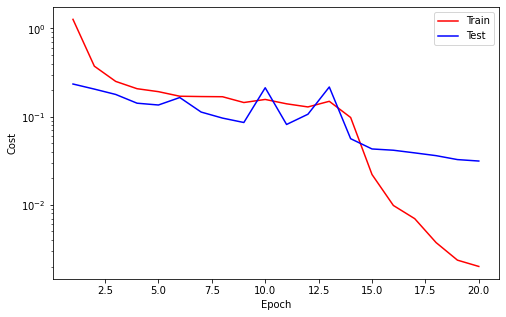

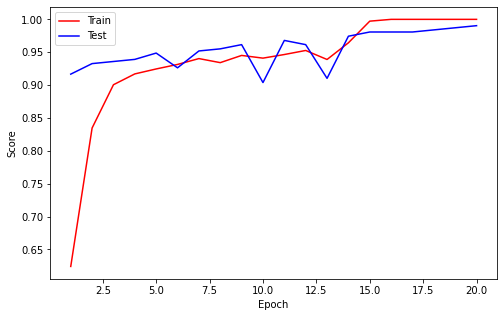

Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.0013 | Test_cost  = 0.0305 | Train_score = 1.0000 | Test_score = 0.9872 |
==> EarlyStop patience =  1 | Best test_score: 0.9904


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.0023 | Test_cost  = 0.0308 | Train_score = 1.0000 | Test_score = 0.9872 |
==> EarlyStop patience =  2 | Best test_score: 0.9904


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.0011 | Test_cost  = 0.0292 | Train_score = 1.0000 | Test_score = 0.9872 |
==> EarlyStop patience =  3 | Best test_score: 0.9904


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.0008 | Test_cost  = 0.0299 | Train_score = 1.0000 | Test_score = 0.9904 |
==> EarlyStop patience =  4 | Best test_score: 0.9904


Train:   0%|          | 0/23 [00:00<?, ?it/s]

Test:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.0006 | Test_cost  = 0.0272 | Train_score = 1.0000 | Test_score = 0.9904 |
==> EarlyStop patience =  5 | Best test_score: 0.9904
==> Execute Early Stopping at epoch: 25 | Best test_score: 0.9904
==> Best model is saved at model


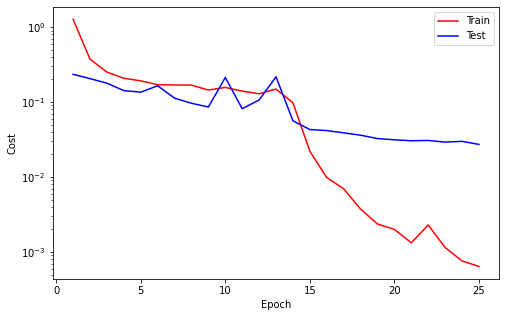

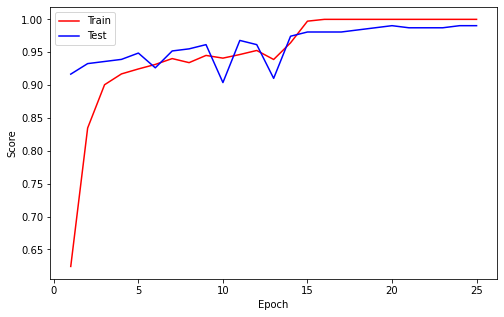

In [ ]:
while True:
  train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn("test", val_set, valloader, model, criterion, optimizer, device)

  # Logging
  callback.log(train_cost, test_cost, train_score, test_score)

  # Checkpoint
  callback.save_checkpoint()

  # Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  # Early Stopping
  if callback.early_stopping(model, monitor="test_score"):
    callback.plot_cost()
    callback.plot_score()
    break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r "model_front_car_assessment_08-10-21_resnet50.zip" "./model"

  adding: model/ (stored 0%)
  adding: model/configs.pth (deflated 51%)
  adding: model/weights_best.pth (deflated 7%)
  adding: model/logs.pth (deflated 32%)


# Predict

In [ ]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [ ]:
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)

preds

tensor([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
def inverse_norm(img):
  img[0, :, :] = img[0, :, :] * 0.229 + 0.485
  img[1, :, :] = img[1, :, :] * 0.224 + 0.456
  img[2, :, :] = img[2, :, :] * 0.225 + 0.406
  return img

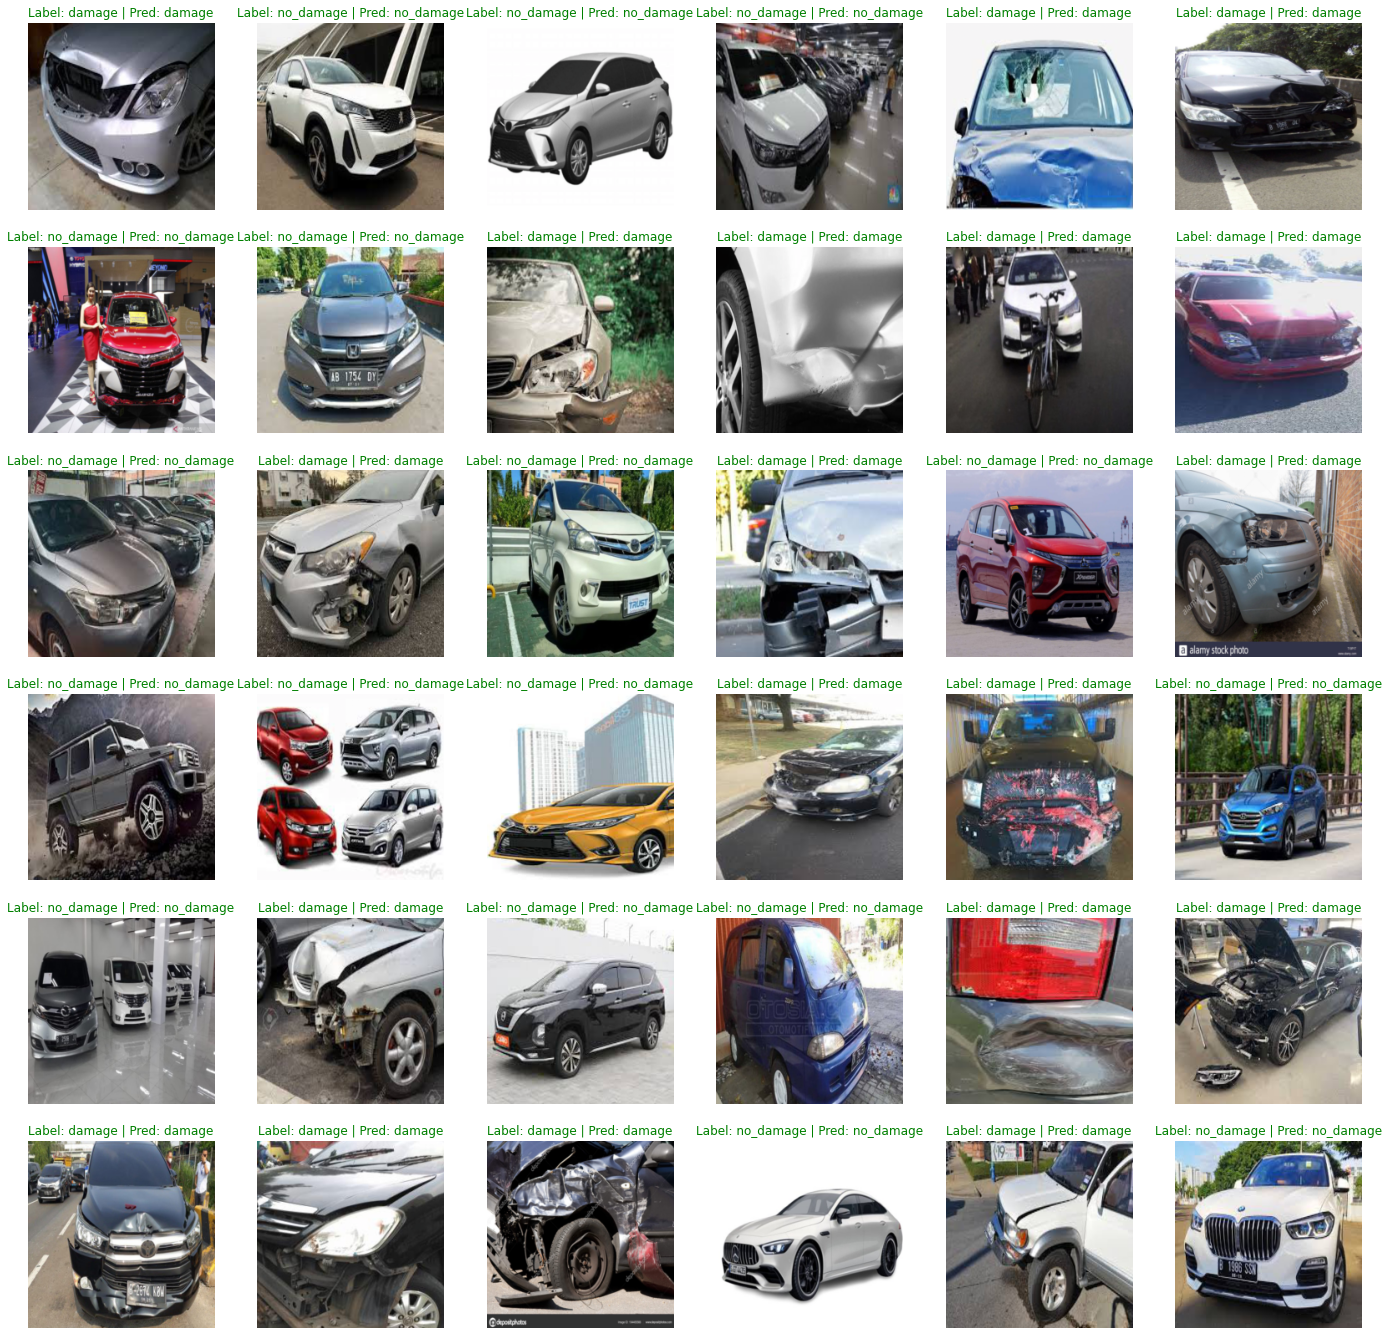

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
  ax.imshow(inverse_norm(img).permute(1, 2, 0).cpu())
  font = {"color": 'r'} if label != pred else {"color": 'g'}
  label, pred = label2cat[label.item()], label2cat[pred.item()]
  ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font);
  ax.axis('off');

# Evaluation

## Validation Score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
valloader = DataLoader(val_set, batch_size=1400, shuffle=True)

In [ ]:
for data in valloader:
    feature, target = data

feature, target = feature.to(device), target.to(device)

In [ ]:
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)

preds

tensor([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [ ]:
print(classification_report(target.to('cpu'), preds.to('cpu'), target_names=label2cat))

              precision    recall  f1-score   support

      damage       0.99      0.99      0.99       170
   no_damage       0.99      0.99      0.99       142

    accuracy                           0.99       312
   macro avg       0.99      0.99      0.99       312
weighted avg       0.99      0.99      0.99       312



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target.to('cpu'), preds.to('cpu'))
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 99.0% 


In [ ]:
cf_matrix = confusion_matrix(target.to('cpu'), preds.to('cpu'))
cf_matrix

array([[169,   1],
       [  2, 140]])

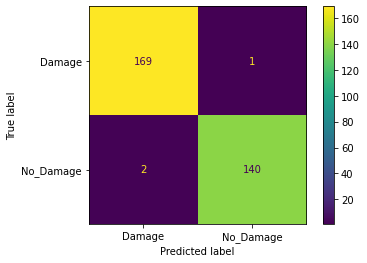

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Damage', 'No_Damage']).plot(values_format='.3g')

## Testing Score

In [ ]:
testloader = DataLoader(test_set, batch_size=1400, shuffle=True)

In [ ]:
for data in testloader:
    feature, target = data

feature, target = feature.to(device), target.to(device)

In [ ]:
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)

preds

tensor([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [ ]:
print(classification_report(target.to('cpu'), preds.to('cpu'), target_names=label2cat))

              precision    recall  f1-score   support

      damage       0.98      0.96      0.97       164
   no_damage       0.96      0.97      0.97       148

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target.to('cpu'), preds.to('cpu'))
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 96.8% 


In [ ]:
cf_matrix = confusion_matrix(target.to('cpu'), preds.to('cpu'))
cf_matrix

array([[158,   6],
       [  4, 144]])

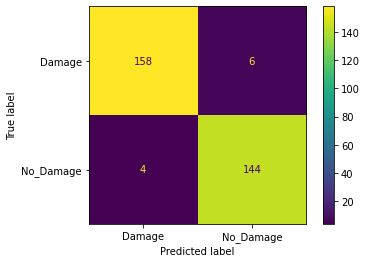

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Damage', 'No_Damage']).plot(values_format='.3g')

# Inference Model

In [ ]:
from torchvision import transforms
from PIL import Image

def transform_image(image):
    # Load Image
    img = Image.open(image)
    img = img.convert('RGB')
    
    # Transform Image
    crop_size = 230

    transform = transforms.Compose([
        transforms.Resize((crop_size, crop_size)),
        transforms.CenterCrop(224)
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

    input = transform(img)
    input = input.unsqueeze(0)

    return input

In [ ]:
import torch
from torch import nn
from torchvision.models import shufflenet_v2_x1_0

class FrontDamageNet(nn.Module):
    def __init__(self, output_size=2):
        super().__init__()
        self.basemodel = shufflenet_v2_x1_0(pretrained=True)
        self.freeze()
        self.basemodel.fc = nn.Sequential(
            nn.Linear(1024, 512),
            nn.Linear(512, output_size),
            nn.LogSoftmax(dim=1)
        )
    
    def forward(self, x):
        x = self.basemodel(x)
        return x

    def freeze(self):
        for param in self.basemodel.parameters():
            param.requires_grad = False # Freezing Weight
    
    def unfreeze(self):
        for param in self.basemodel.parameters():
            param.requires_grad = True # Unfreezing Weight

    def predict(self, x):
        with torch.no_grad():
            self.basemodel.eval()
            output = self.basemodel(x)
            preds = output.argmax(1)
        return preds

In [ ]:
def predict_damage(img):
    # Support to GPU and CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input = transform_image(img)

    model = FrontDamageNet(output_size=2)
    model.load_state_dict(torch.load('model/weights_best.pth', map_location=device))
    labels = ['Damage', 'Good']
    preds = model.predict(input)

    return labels[preds]

In [ ]:
%%time
predict_damage('/content/0099a71b26.jpg')

CPU times: user 781 ms, sys: 73 ms, total: 854 ms
Wall time: 861 ms


'Damage'